In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [ ]:
# Belle Campground

In [216]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series = data['occupancyRate2']

In [217]:
data

,index,timeIndex,Group.Description,Campground,This.Month,month,year,monthNum,daysPerMonth,numCamps,totalPossOccupant,occupancyRate,occupancyRate2
monthyear,,,,,,,,,,,,,
1993-01-01,853,5,Tent Sites Occupied,Belle,156,Jan,1993,1,31,18,558,0.279570,0.279570
1993-02-01,637,13,Tent Sites Occupied,Belle,158,Feb,1993,2,28,18,504,0.313492,0.313492
1993-03-01,1501,21,Tent Sites Occupied,Belle,292,Mar,1993,3,31,18,558,0.523297,0.523297
1993-04-01,5,29,Tent Sites Occupied,Belle,333,Apr,1993,4,30,18,540,0.616667,0.616667
1993-05-01,1717,37,Tent Sites Occupied,Belle,227,May,1993,5,31,18,558,0.406810,0.406810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,1709,2517,Tent Sites Occupied,Belle,310,Mar,2019,3,31,18,558,0.555556,0.555556
2019-04-01,213,2525,Tent Sites Occupied,Belle,290,Apr,2019,4,30,18,540,0.537037,0.537037
2019-05-01,1925,2533,Tent Sites Occupied,Belle,233,May,2019,5,31,18,558,0.417563,0.417563


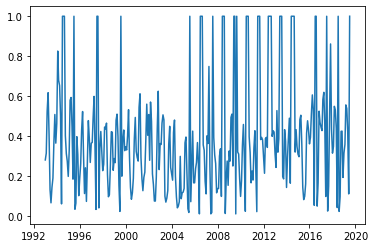

In [218]:
plt.plot(series)

In [219]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series) * percent_training)
training, testing = series[0:split_point], series[split_point:]

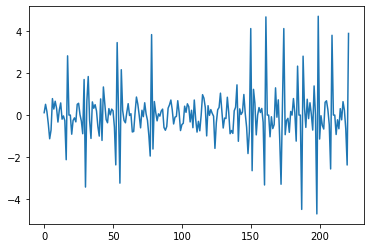

In [220]:
# Because the series is multiplicative, apply a log transform
training = np.log(training)

# Adjust for linear trend
training_diff = training.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


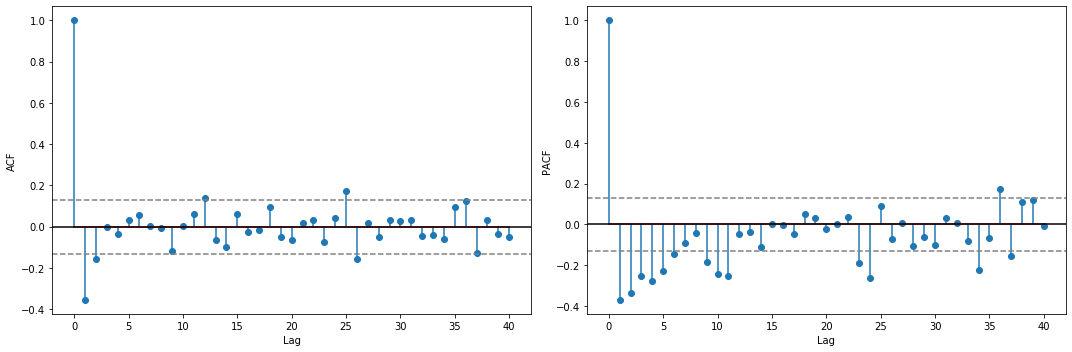

In [221]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training_diff, nlags = 40)
lag_pacf = pacf(training_diff, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [322]:
# SARIMA model parameters: (p,d,q)(P,D,Q,S)

# p is equal to the first lag where the PACF value is above the significance level
# d: 0 = no trend; 1 = constant trend, 2 = time-dependent trend
# q is equal to the first lag where the ACF value is above the significance level.
# P should be 1 or higher if ACF is POSITIVE at lag S, otherwise = 0.
# D: 0 = no stable seasonal pattern, 1 = stable seasonal pattern (d + D should be <= 2)
# Q should be 1 or higher if ACF is NEGATIVE at lag S, otherwise = 0. (P + Q should be <= 2)
# S is the ACF with the highest lag (seasonality)

In [222]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model = SARIMAX(training, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit = model.fit(disp=False) # extract the fitted model
print(model_fit.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -261.284
Date:                            Tue, 24 Sep 2019   AIC                            532.568
Time:                                    13:41:40   BIC                            548.697
Sample:                                01-01-1993   HQIC                           539.104
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5485      0.549     -0.999      0.318      -1.625       0.528
ma.L1          0.6249      0.544   

[[1.         0.41235267]
 [0.41235267 1.        ]]
0.851431704823951
0.4078481169458884


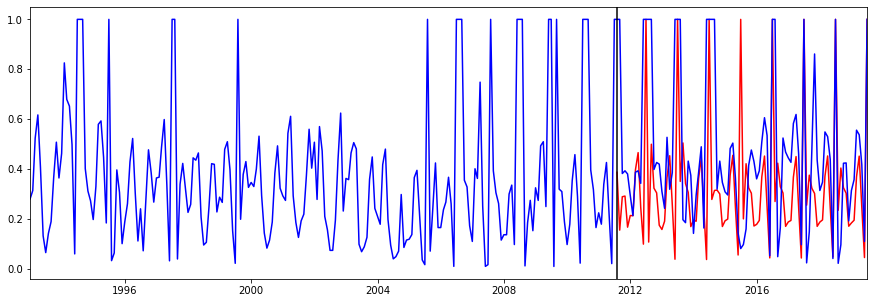

In [303]:
# Now we can forecast
K = len(testing) # number of future steps we want to forecast
forecast = model_fit.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast = np.exp(forecast) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast,'r');
plt.plot(series,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast, testing)
print(corr)
mape = np.mean(np.abs(forecast - testing)/np.abs(testing))
print(mape)
mins = np.amin(np.hstack([forecast[:,None], testing[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast[:,None], testing[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [224]:
forecast[96:120]

2019-08-01    0.252472
2019-09-01    0.404463
2019-10-01    0.325707
2019-11-01    0.302658
2019-12-01    0.169975
2020-01-01    0.185776
2020-02-01    0.194311
2020-03-01    0.368533
2020-04-01    0.450845
2020-05-01    0.245417
2020-06-01    0.044484
2020-07-01    0.999918
2020-08-01    0.249053
2020-09-01    0.392261
2020-10-01    0.324048
2020-11-01    0.302245
2020-12-01    0.169994
2021-01-01    0.185689
2021-02-01    0.194867
2021-03-01    0.369480
2021-04-01    0.451488
2021-05-01    0.245837
2021-06-01    0.045648
2021-07-01    0.999915
Freq: MS, dtype: float64

In [77]:
# Black Rock Campground

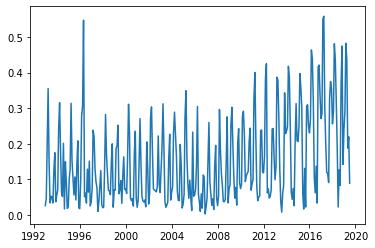

In [82]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series2 = data2['occupancyRate2']
plt.plot(series2)

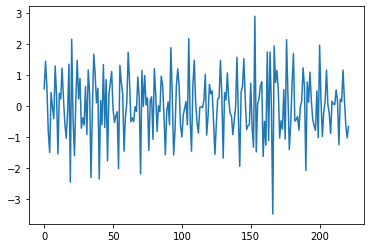

In [100]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series2) * percent_training)
training2, testing2 = series2[0:split_point], series2[split_point:]

# Because the series is multiplicative, apply a log transform
training2 = np.log(training2)

# Adjust for linear trend
training_diff2 = training2.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff2)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


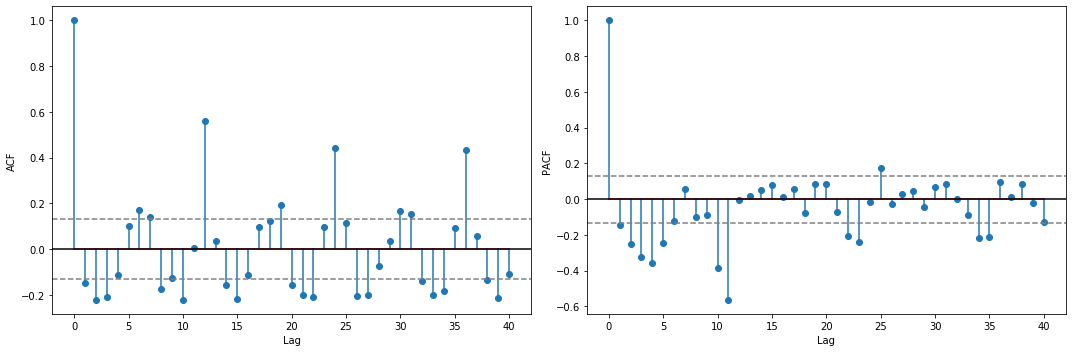

In [107]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf2 = acf(training_diff2, nlags = 40)
lag_pacf2 = pacf(training_diff2, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf2)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf2)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [108]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model2 = SARIMAX(training2, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit2 = model2.fit(disp=False) # extract the fitted model
print(model_fit2.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -169.626
Date:                            Tue, 24 Sep 2019   AIC                            349.252
Time:                                    13:02:54   BIC                            365.381
Sample:                                01-01-1993   HQIC                           355.788
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9230      0.076     12.218      0.000       0.775       1.071
ma.L1         -0.8038      0.124   

[[1.         0.79756086]
 [0.79756086 1.        ]]
0.5794739618818429
0.3761414590566644


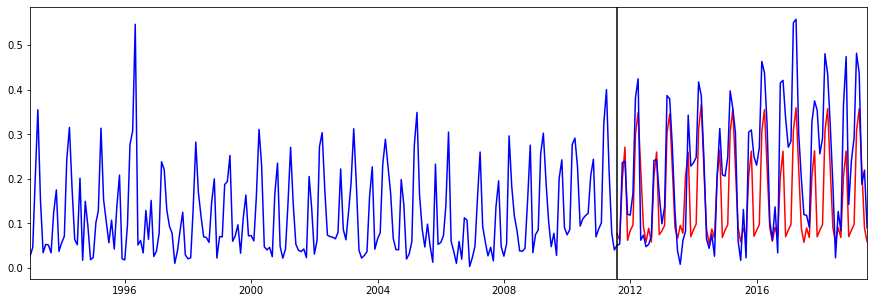

In [304]:
## Now we can forecast
K = len(testing2) # number of future steps we want to forecast
forecast2 = model_fit2.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast2 = np.exp(forecast2) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast2,'r');
plt.plot(series2,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast2, testing2)
print(corr)
mape = np.mean(np.abs(forecast2 - testing2)/np.abs(testing2))
print(mape)
mins = np.amin(np.hstack([forecast2[:,None], testing2[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast2[:,None], testing2[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [212]:
forecast2[96:120]

2019-08-01    0.090397
2019-09-01    0.068981
2019-10-01    0.205649
2019-11-01    0.262543
2019-12-01    0.070044
2020-01-01    0.084614
2020-02-01    0.097325
2020-03-01    0.307720
2020-04-01    0.358137
2020-05-01    0.224950
2020-06-01    0.089663
2020-07-01    0.058191
2020-08-01    0.090071
2020-09-01    0.068531
2020-10-01    0.205558
2020-11-01    0.262729
2020-12-01    0.069999
2021-01-01    0.084570
2021-02-01    0.097268
2021-03-01    0.307481
2021-04-01    0.357643
2021-05-01    0.224972
2021-06-01    0.089801
2021-07-01    0.058404
Freq: MS, dtype: float64

In [ ]:
# Cottonwood Campground

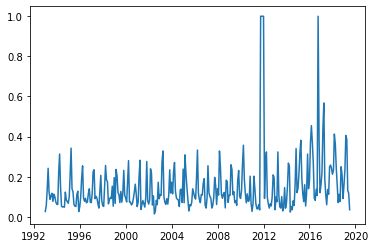

In [124]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series3 = data3['occupancyRate2']
plt.plot(series3)

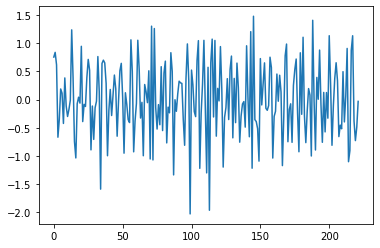

In [106]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series3) * percent_training)
training3, testing3 = series3[0:split_point], series3[split_point:]

# Because the series is multiplicative, apply a log transform
training3 = np.log(training3)

# Adjust for linear trend
training_diff3 = training3.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff3)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


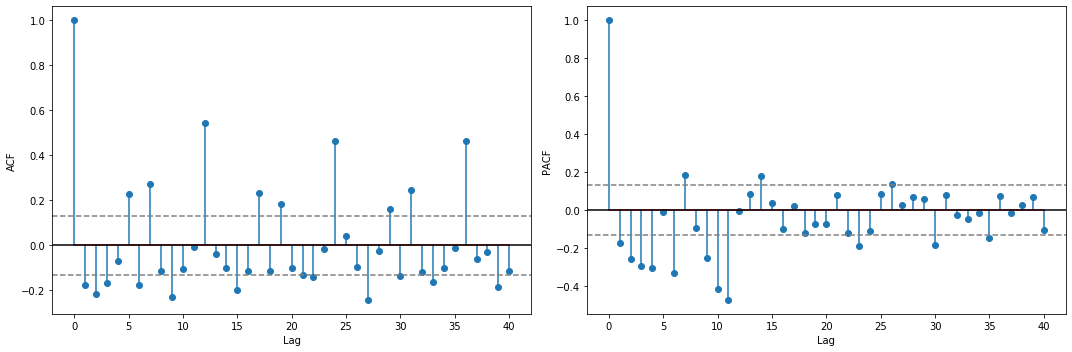

In [109]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf3 = acf(training_diff3, nlags = 40)
lag_pacf3 = pacf(training_diff3, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf3)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf3)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [260]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model3 = SARIMAX(training3, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit3 = model3.fit(disp=False) # extract the fitted model
print(model_fit3.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                 -98.784
Date:                            Fri, 27 Sep 2019   AIC                            207.569
Time:                                    08:23:02   BIC                            223.697
Sample:                                01-01-1993   HQIC                           214.104
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2333      0.264     -0.885      0.376      -0.750       0.284
ma.L1          0.4916      0.234   

[[1.         0.40346494]
 [0.40346494 1.        ]]
0.4719203693663549
0.3967973273040838


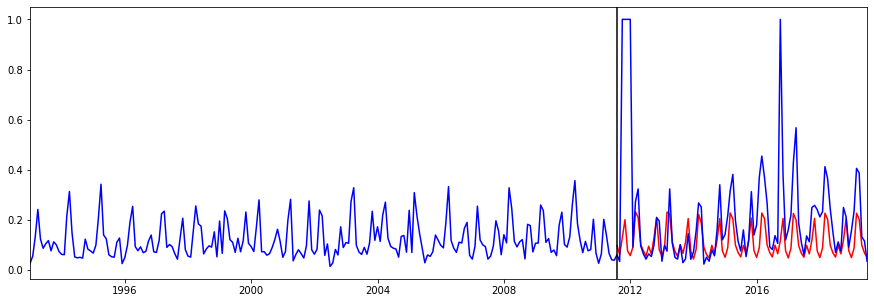

In [305]:
# Now we can forecast
K = len(testing3) # number of future steps we want to forecast
forecast3 = model_fit3.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast3 = np.exp(forecast3) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast3,'r');
plt.plot(series3,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast3, testing3)
print(corr)
mape = np.mean(np.abs(forecast3 - testing3)/np.abs(testing3))
print(mape)
mins = np.amin(np.hstack([forecast3[:,None], testing3[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast3[:,None], testing3[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [122]:
forecast3[96:120]

2019-08-01    0.099098
2019-09-01    0.064940
2019-10-01    0.118346
2019-11-01    0.206342
2019-12-01    0.077246
2020-01-01    0.049374
2020-02-01    0.087991
2020-03-01    0.226641
2020-04-01    0.201722
2020-05-01    0.098820
2020-06-01    0.067966
2020-07-01    0.051794
2020-08-01    0.098991
2020-09-01    0.064846
2020-10-01    0.118699
2020-11-01    0.206343
2020-12-01    0.077319
2021-01-01    0.049617
2021-02-01    0.088194
2021-03-01    0.226848
2021-04-01    0.202292
2021-05-01    0.099107
2021-06-01    0.068247
2021-07-01    0.051907
Freq: MS, dtype: float64

In [ ]:
# Hidden Valley Campground

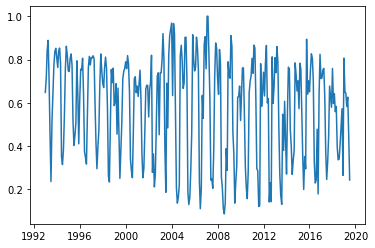

In [125]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data4 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series4 = data4['occupancyRate2']
plt.plot(series4)

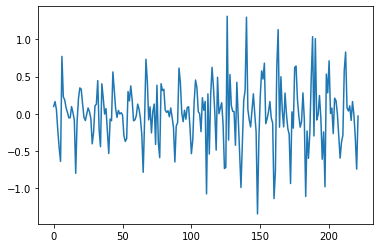

In [126]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series4) * percent_training)
training4, testing4 = series4[0:split_point], series4[split_point:]

# Because the series is multiplicative, apply a log transform
training4 = np.log(training4)

# Adjust for linear trend
training_diff4 = training4.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff4)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


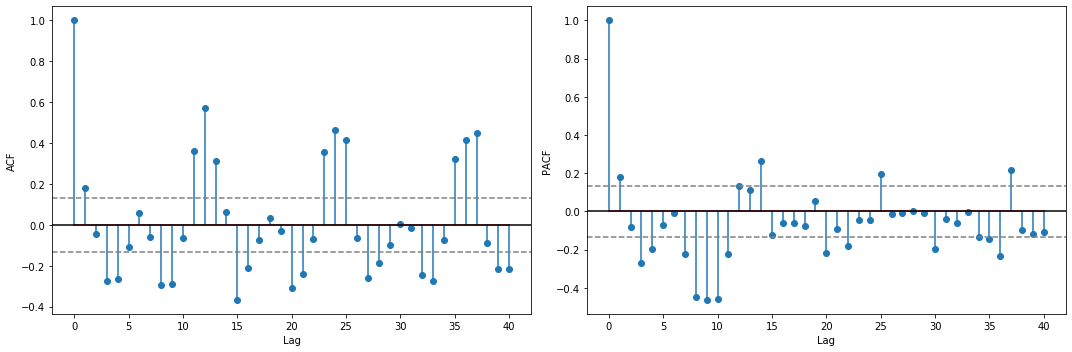

In [127]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf4 = acf(training_diff4, nlags = 40)
lag_pacf4 = pacf(training_diff4, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf4)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf4)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [132]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model4 = SARIMAX(training4, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit4 = model4.fit(disp=False) # extract the fitted model
print(model_fit4.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                 -17.541
Date:                            Tue, 24 Sep 2019   AIC                             45.082
Time:                                    13:10:47   BIC                             61.211
Sample:                                01-01-1993   HQIC                            51.618
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7668      0.107      7.138      0.000       0.556       0.977
ma.L1         -0.4996      0.154   

[[1.         0.79889015]
 [0.79889015 1.        ]]
0.26412826140328155
0.18869428841183833


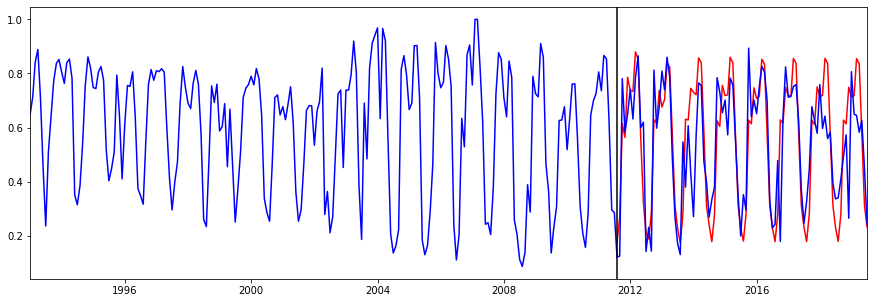

In [306]:
# Now we can forecast
K = len(testing4) # number of future steps we want to forecast
forecast4 = model_fit4.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast4 = np.exp(forecast4) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast4,'r');
plt.plot(series4,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast4, testing4)
print(corr)
mape = np.mean(np.abs(forecast4 - testing4)/np.abs(testing4))
print(mape)
mins = np.amin(np.hstack([forecast4[:,None], testing4[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast4[:,None], testing4[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [133]:
forecast4[96:120]

2019-08-01    0.178509
2019-09-01    0.279584
2019-10-01    0.627667
2019-11-01    0.613866
2019-12-01    0.749196
2020-01-01    0.715112
2020-02-01    0.718205
2020-03-01    0.855436
2020-04-01    0.837141
2020-05-01    0.580152
2020-06-01    0.311920
2020-07-01    0.231688
2020-08-01    0.178619
2020-09-01    0.279504
2020-10-01    0.627489
2020-11-01    0.613114
2020-12-01    0.749536
2021-01-01    0.714758
2021-02-01    0.718190
2021-03-01    0.855511
2021-04-01    0.837132
2021-05-01    0.579820
2021-06-01    0.312079
2021-07-01    0.231296
Freq: MS, dtype: float64

In [ ]:
# Indian Cove Campground

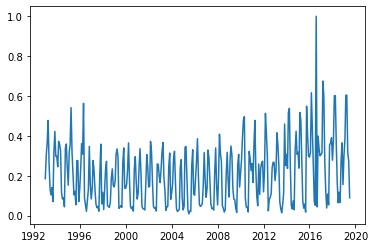

In [135]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data4 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data5 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series5 = data5['occupancyRate2']
plt.plot(series5)

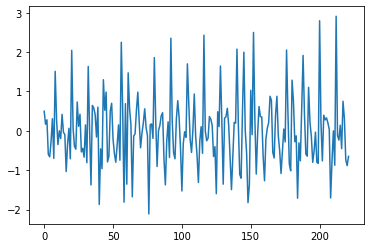

In [136]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series5) * percent_training)
training5, testing5 = series5[0:split_point], series5[split_point:]

# Because the series is multiplicative, apply a log transform
training5 = np.log(training5)

# Adjust for linear trend
training_diff5 = training5.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff5)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


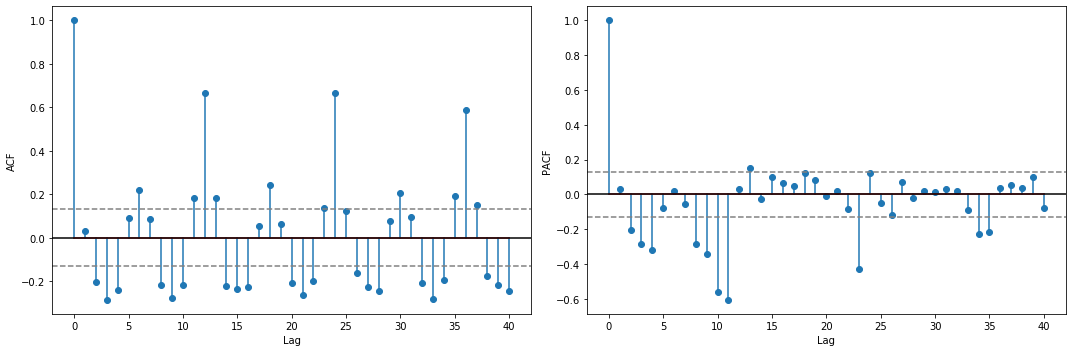

In [137]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf5 = acf(training_diff5, nlags = 40)
lag_pacf5 = pacf(training_diff5, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf5)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf5)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [145]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model5 = SARIMAX(training5, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit5 = model5.fit(disp=False) # extract the fitted model
print(model_fit5.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -110.037
Date:                            Tue, 24 Sep 2019   AIC                            230.075
Time:                                    13:15:53   BIC                            246.203
Sample:                                01-01-1993   HQIC                           236.611
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9311      0.050     18.730      0.000       0.834       1.028
ma.L1         -0.7794      0.086   

[[1.         0.74184602]
 [0.74184602 1.        ]]
0.37277230924361543
0.30956777346091735


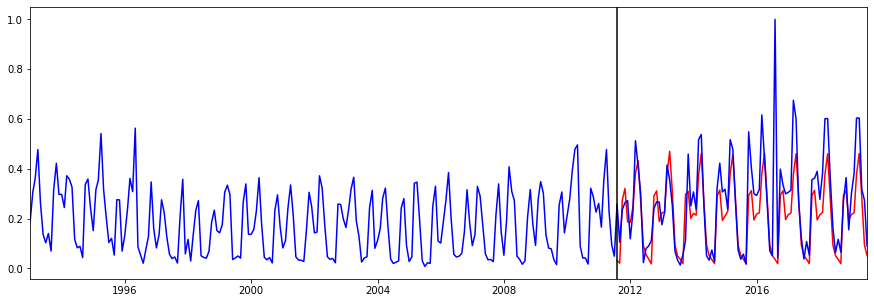

In [307]:
# Now we can forecast
K = len(testing5) # number of future steps we want to forecast
forecast5 = model_fit5.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast5 = np.exp(forecast5) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast5,'r');
plt.plot(series5,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast5, testing5)
print(corr)
mape = np.mean(np.abs(forecast5 - testing5)/np.abs(testing5))
print(mape)
mins = np.amin(np.hstack([forecast5[:,None], testing5[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast5[:,None], testing5[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [147]:
forecast5[96:120]

2019-08-01    0.036607
2019-09-01    0.019427
2019-10-01    0.293013
2019-11-01    0.313240
2019-12-01    0.195331
2020-01-01    0.216192
2020-02-01    0.223774
2020-03-01    0.377914
2020-04-01    0.460948
2020-05-01    0.282123
2020-06-01    0.093525
2020-07-01    0.051696
2020-08-01    0.036602
2020-09-01    0.019419
2020-10-01    0.292878
2020-11-01    0.313312
2020-12-01    0.195105
2021-01-01    0.216145
2021-02-01    0.224081
2021-03-01    0.378041
2021-04-01    0.461033
2021-05-01    0.282792
2021-06-01    0.093521
2021-07-01    0.051668
Freq: MS, dtype: float64

In [ ]:
# Jumbo Rocks Campground

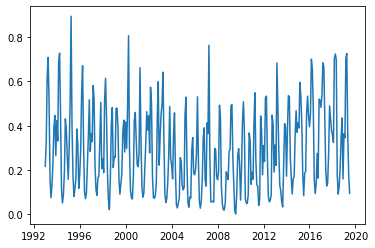

In [149]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data4 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data5 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data6 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series6 = data6['occupancyRate2']
plt.plot(series6)

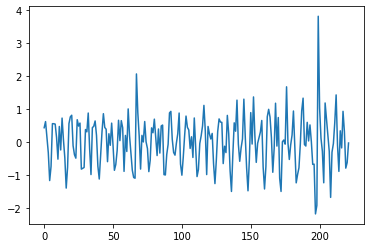

In [150]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series6) * percent_training)
training6, testing6 = series6[0:split_point], series6[split_point:]

# Because the series is multiplicative, apply a log transform
training6 = np.log(training6)

# Adjust for linear trend
training_diff6 = training6.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff6)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


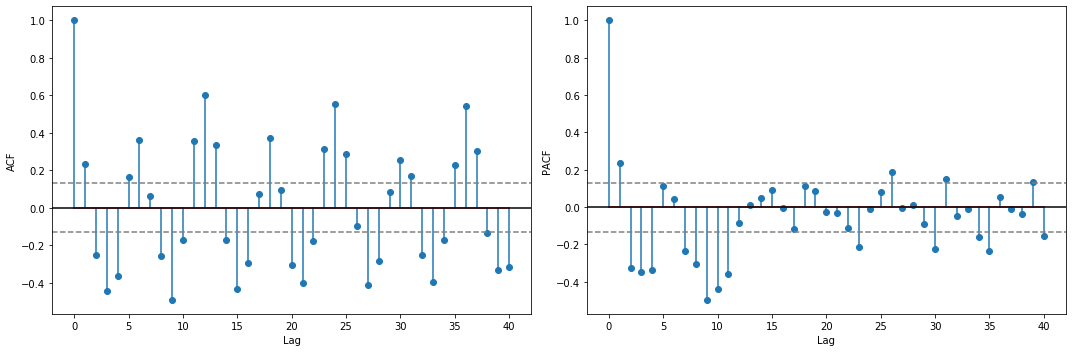

In [151]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf6 = acf(training_diff6, nlags = 40)
lag_pacf6 = pacf(training_diff6, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf6)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf6)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [165]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model6 = SARIMAX(training6, order = (1,1,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit6 = model6.fit(disp=False) # extract the fitted model
print(model_fit6.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 1, 1)x(2, 1, 0, 12)   Log Likelihood                -112.039
Date:                            Tue, 24 Sep 2019   AIC                            234.078
Time:                                    13:22:26   BIC                            250.180
Sample:                                01-01-1993   HQIC                           240.604
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3190      0.060      5.339      0.000       0.202       0.436
ma.L1         -0.9524      0.036   

[[1.         0.86116357]
 [0.86116357 1.        ]]
0.3175889227518071
0.27216328979513305


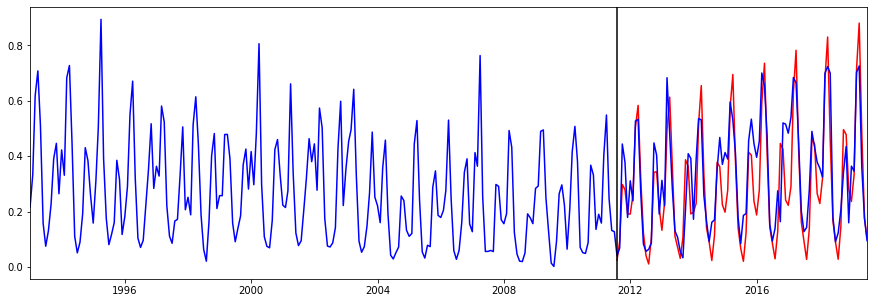

In [308]:
# Now we can forecast
K = len(testing6) # number of future steps we want to forecast
forecast6 = model_fit6.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast6 = np.exp(forecast6) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast6,'r');
plt.plot(series6,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast6, testing6)
print(corr)
mape = np.mean(np.abs(forecast6 - testing6)/np.abs(testing6))
print(mape)
mins = np.amin(np.hstack([forecast6[:,None], testing6[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast6[:,None], testing6[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [162]:
forecast6[96:120]

2019-08-01    0.032583
2019-09-01    0.154390
2019-10-01    0.527624
2019-11-01    0.505830
2019-12-01    0.294137
2020-01-01    0.260007
2020-02-01    0.352501
2020-03-01    0.756201
2020-04-01    0.935180
2020-05-01    0.509493
2020-06-01    0.191022
2020-07-01    0.108171
2020-08-01    0.032927
2020-09-01    0.164111
2020-10-01    0.555855
2020-11-01    0.534585
2020-12-01    0.315660
2021-01-01    0.272349
2021-02-01    0.378186
2021-03-01    0.805637
2021-04-01    0.992360
2021-05-01    0.545642
2021-06-01    0.200981
2021-07-01    0.111577
Freq: MS, dtype: float64

In [ ]:
# Ryan Campground

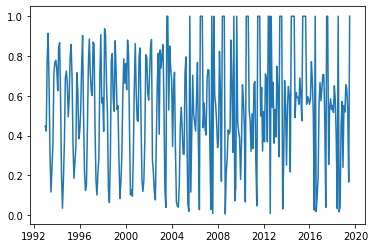

In [167]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data4 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data5 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data6 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data7 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)

series7 = data7['occupancyRate2']
plt.plot(series7)

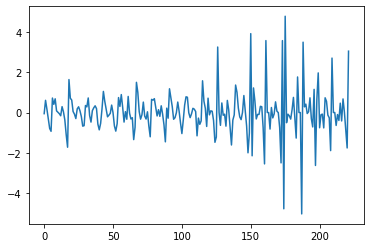

In [297]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series7) * percent_training)
training7, testing7 = series7[0:split_point], series7[split_point:]

# Because the series is multiplicative, apply a log transform
training7 = np.log(training7)

# Adjust for linear trend
training_diff7 = training7.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff7)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


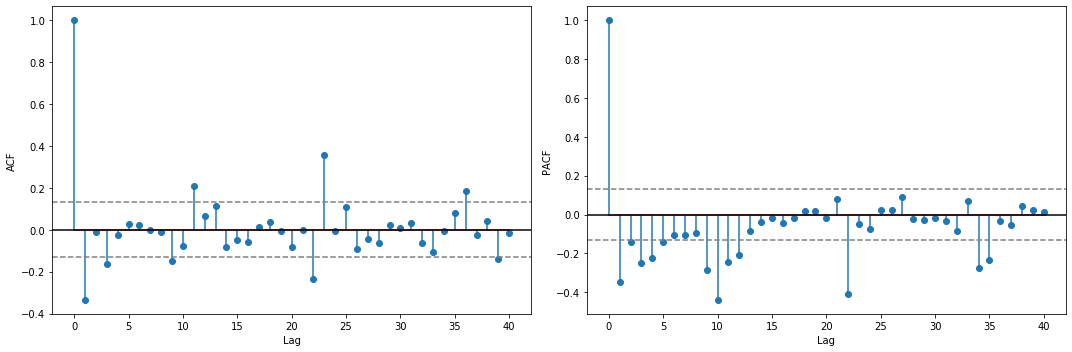

In [298]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf7 = acf(training_diff7, nlags = 40)
lag_pacf7 = pacf(training_diff7, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf7)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf7)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [299]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model7 = SARIMAX(training7, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit7 = model7.fit(disp=False) # extract the fitted model
print(model_fit7.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -232.502
Date:                            Fri, 27 Sep 2019   AIC                            475.003
Time:                                    09:07:48   BIC                            491.132
Sample:                                01-01-1993   HQIC                           481.539
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5207      0.452      1.152      0.249      -0.365       1.407
ma.L1         -0.6046      0.432   

[[1.         0.28174723]
 [0.28174723 1.        ]]
1.6879339106422526
0.3721577431751374


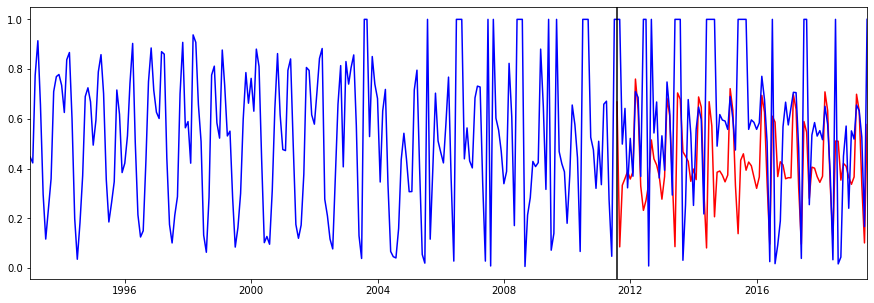

In [309]:
# Now we can forecast
K = len(testing7) # number of future steps we want to forecast
forecast7 = model_fit7.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast7 = np.exp(forecast7) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast7,'r');
plt.plot(series7,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast7, testing7)
print(corr)
mape = np.mean(np.abs(forecast7 - testing7)/np.abs(testing7))
print(mape)
mins = np.amin(np.hstack([forecast7[:,None], testing7[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast7[:,None], testing7[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [178]:
forecast7[96:120]

2019-08-01    0.475723
2019-09-01    0.305015
2019-10-01    0.376275
2019-11-01    0.368394
2019-12-01    0.326354
2020-01-01    0.315969
2020-02-01    0.329090
2020-03-01    0.631070
2020-04-01    0.572431
2020-05-01    0.297170
2020-06-01    0.091569
2020-07-01    0.511484
2020-08-01    0.454410
2020-09-01    0.278246
2020-10-01    0.366048
2020-11-01    0.360527
2020-12-01    0.325268
2021-01-01    0.305943
2021-02-01    0.327269
2021-03-01    0.626918
2021-04-01    0.564319
2021-05-01    0.296877
2021-06-01    0.095638
2021-07-01    0.484906
Freq: MS, dtype: float64

In [ ]:
# White Tank Campground

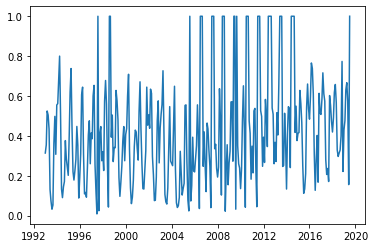

In [179]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data2 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data4 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data5 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data6 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data7 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
data8 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)

series8 = data8['occupancyRate2']
plt.plot(series8)

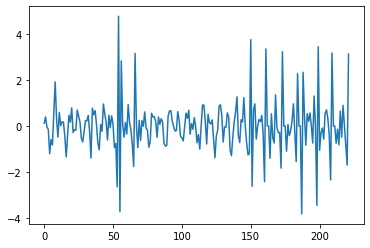

In [180]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series8) * percent_training)
training8, testing8 = series8[0:split_point], series8[split_point:]

# Because the series is multiplicative, apply a log transform
training8 = np.log(training8)

# Adjust for linear trend
training_diff8 = training8.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff8)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


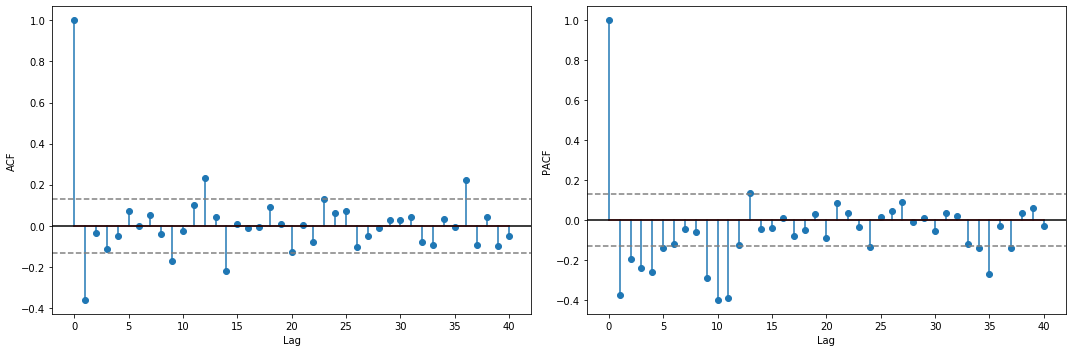

In [181]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf8 = acf(training_diff8, nlags = 40)
lag_pacf8 = pacf(training_diff8, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf8)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf8)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [187]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model8 = SARIMAX(training8, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit8 = model8.fit(disp=False) # extract the fitted model
print(model_fit8.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -226.660
Date:                            Tue, 24 Sep 2019   AIC                            463.320
Time:                                    13:32:08   BIC                            479.449
Sample:                                01-01-1993   HQIC                           469.856
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0736      2.393     -0.031      0.975      -4.764       4.617
ma.L1          0.0514      2.402   

[[1.         0.19961623]
 [0.19961623 1.        ]]
0.6325389799212867
0.3899180528121017


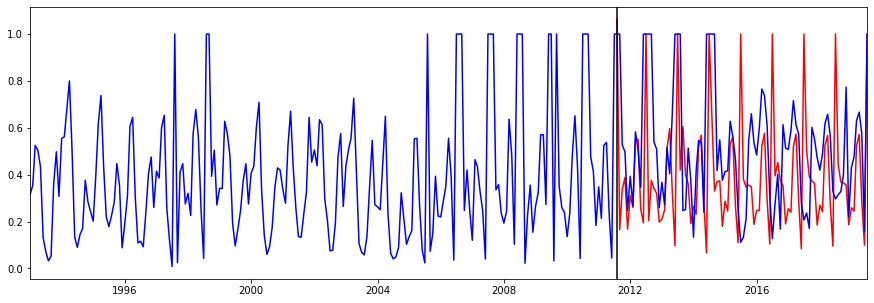

In [310]:
# Now we can forecast
K = len(testing8) # number of future steps we want to forecast
forecast8 = model_fit8.forecast(K, alpha = 0.05) # apply the forecast model out to K steps
forecast8 = np.exp(forecast8) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast8,'r');
plt.plot(series8,'b');
#plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');

corr = np.corrcoef(forecast8, testing8)
print(corr)
mape = np.mean(np.abs(forecast8 - testing8)/np.abs(testing8))
print(mape)
mins = np.amin(np.hstack([forecast8[:,None], testing8[:,None]]), axis=1)
maxs = np.amax(np.hstack([forecast8[:,None], testing8[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) 
print(minmax)

In [189]:
forecast8[96:120]

2019-08-01    0.419036
2019-09-01    0.405366
2019-10-01    0.369647
2019-11-01    0.354683
2019-12-01    0.188017
2020-01-01    0.256974
2020-02-01    0.242103
2020-03-01    0.521869
2020-04-01    0.572553
2020-05-01    0.288092
2020-06-01    0.091822
2020-07-01    1.000000
2020-08-01    0.456767
2020-09-01    0.399372
2020-10-01    0.371414
2020-11-01    0.358624
2020-12-01    0.186639
2021-01-01    0.262858
2021-02-01    0.241915
2021-03-01    0.523337
2021-04-01    0.569944
2021-05-01    0.283996
2021-06-01    0.093068
2021-07-01    1.000000
Freq: MS, dtype: float64

In [ ]:
# Belle (1,0,1) (2,1,0,12)
# Black Rock (1,0,1) (2,1,0,12)
# Cottonwood (1,0,1) (2,1,0,12)
# Hidden Valley (1,0,1) (1,1,0,12)
# Indian Cove (1,1,1) (1,1,0,12)
# Jumbo Rocks (1,0,1) (1,0,0,12)
# Ryan (1,1,1) (1,1,0,12)
# White Tank (1,0,1) (2,1,0,12)

In [227]:
fc1=pd.DataFrame(forecast[96:120])
fc1.columns=['Belle']
fc2=pd.DataFrame(forecast2[96:120])
fc2.columns=['BlackRock']
fc3=pd.DataFrame(forecast3[96:120])
fc3.columns=['Cottonwood']
fc4=pd.DataFrame(forecast4[96:120])
fc4.columns=['HiddenValley']
fc5=pd.DataFrame(forecast5[96:120])
fc5.columns=['IndianCove']
fc6=pd.DataFrame(forecast6[96:120])
fc6.columns=['JumboRocks']
fc7=pd.DataFrame(forecast7[96:120])
fc7.columns=['Ryan']
fc8=pd.DataFrame(forecast8[96:120])
fc8.columns=['WhiteTank']

fc10 = fc1.join(fc2)
fc10 = fc10.join(fc3)
fc10 = fc10.join(fc4)
fc10 = fc10.join(fc5)
fc10 = fc10.join(fc6)
fc10 = fc10.join(fc7)
fc10 = fc10.join(fc8)

fc10
#fc10.to_csv(r"~/Documents/campgroundpredictions_twoyears_SARIMA.csv")

,Belle,BlackRock,Cottonwood,HiddenValley,IndianCove,JumboRocks,Ryan,WhiteTank
2019-08-01,0.252472,0.090397,0.099098,0.178509,0.036607,0.032583,0.475723,0.419036
2019-09-01,0.404463,0.068981,0.064940,0.279584,0.019427,0.154390,0.305015,0.405366
2019-10-01,0.325707,0.205649,0.118346,0.627667,0.293013,0.527624,0.376275,0.369647
2019-11-01,0.302658,0.262543,0.206342,0.613866,0.313240,0.505830,0.368394,0.354683
2019-12-01,0.169975,0.070044,0.077246,0.749196,0.195331,0.294137,0.326354,0.188017
2020-01-01,0.185776,0.084614,0.049374,0.715112,0.216192,0.260007,0.315969,0.256974
2020-02-01,0.194311,0.097325,0.087991,0.718205,0.223774,0.352501,0.329090,0.242103
2020-03-01,0.368533,0.307720,0.226641,0.855436,0.377914,0.756201,0.631070,0.521869
2020-04-01,0.450845,0.358137,0.201722,0.837141,0.460948,0.935180,0.572431,0.572553
2020-05-01,0.245417,0.224950,0.098820,0.580152,0.282123,0.509493,0.297170,0.288092


In [210]:
forecast2[96:120]

2019-08-01   -2.311648
2019-09-01   -2.734285
2019-10-01   -2.134145
2019-11-01   -1.578219
2019-12-01   -2.560764
2020-01-01   -3.008327
2020-02-01   -2.430526
2020-03-01   -1.484390
2020-04-01   -1.600865
2020-05-01   -2.314453
2020-06-01   -2.688744
2020-07-01   -2.960476
2020-08-01   -2.312731
2020-09-01   -2.735741
2020-10-01   -2.131165
2020-11-01   -1.578214
2020-12-01   -2.559821
2021-01-01   -3.003413
2021-02-01   -2.428217
2021-03-01   -1.483474
2021-04-01   -1.598044
2021-05-01   -2.311555
2021-06-01   -2.684620
2021-07-01   -2.958300
Freq: MS, dtype: float64

In [43]:
n_periods = 24
fitted, confint = model_fit.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


ValueError: too many values to unpack (expected 2)

In [38]:
n_periods = 24
fitted, confint = forecast(n_periods=n_periods, return_conf_int=True)

TypeError: 'Series' object is not callable

In [36]:
index_of_fc = np.arange(len(series), len(series)+n_periods)
index_of_fc

array([319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
       332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342])

In [75]:
forecast[96:120]

2019-08-01    0.252472
2019-09-01    0.404463
2019-10-01    0.325707
2019-11-01    0.302658
2019-12-01    0.169975
2020-01-01    0.185776
2020-02-01    0.194311
2020-03-01    0.368533
2020-04-01    0.450845
2020-05-01    0.245417
2020-06-01    0.044484
2020-07-01    0.999918
2020-08-01    0.249053
2020-09-01    0.392261
2020-10-01    0.324048
2020-11-01    0.302245
2020-12-01    0.169994
2021-01-01    0.185689
2021-02-01    0.194867
2021-03-01    0.369480
2021-04-01    0.451488
2021-05-01    0.245837
2021-06-01    0.045648
2021-07-01    0.999915
Freq: MS, dtype: float64

In [41]:
fc_series = pd.Series(series, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


NameError: name 'confint' is not defined